In [1]:
import os

import torch
import numpy as np
from offline.convert_datset import merge_rllib_out
from dynamic_programming.policy_iteration import PolicyIteration, PolicyIterationTorch
from dynamic_programming.mdp_model import MDPModel, Policy

import time

## Load Data and MDP Model

In [2]:
device = 'cpu'
load_path = os.path.join("tmp", "ibq-out/ibq_samples.npy")
samples = np.load(load_path,allow_pickle=True)[()]


In [3]:

start = time.time()
mdp_model = MDPModel(states=samples['obs'], next_states=samples['new_obs'], actions=samples['actions'],
                     rewards=samples['rewards'], dones=samples['dones'], device=device)

end = time.time()
print(end - start)


296.3849673271179


## Train

In [5]:
mdp_model.transition_model.shape

torch.Size([477, 27, 477])

0
0.2793886661529541
1
0.280256986618042
2
0.28042173385620117
3
0.28119635581970215
# epoch: 5
eval count = [101, 101, 101, 101, 101]
policy change = [458, 96, 21, 2, 0]


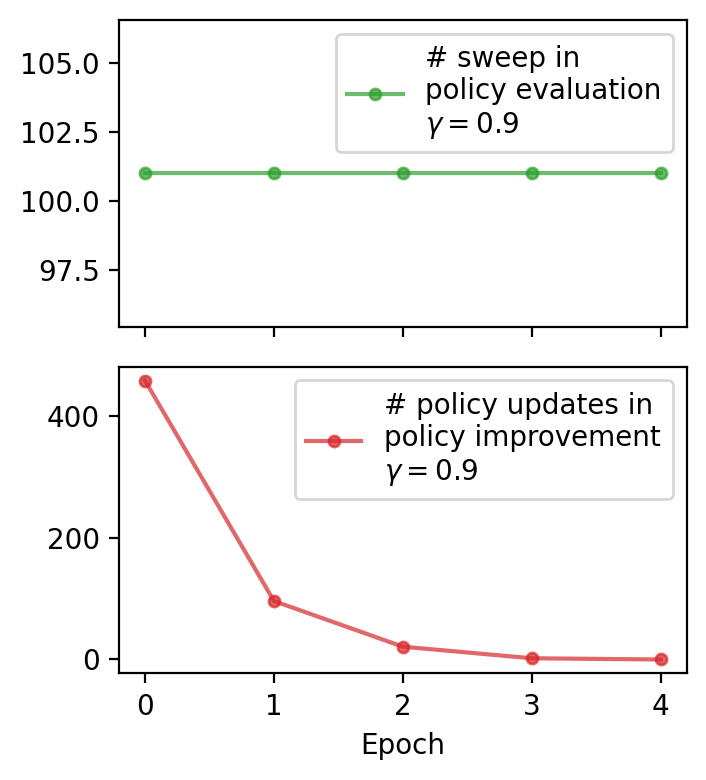

In [6]:
solver = PolicyIteration(mdp_model.reward_function.numpy(), mdp_model.transition_model.numpy(), gamma=0.9)
solver.train()


In [7]:
policy_save_path = 'dynamic_programming/ib_policy.pkl'

trained_policy = Policy(policy_table=solver.policy, state_to_index=mdp_model.state_to_index,
                        index_to_action=mdp_model.index_to_actions)
trained_policy.save(policy_save_path)